# Régression linéaire à plusieurs variables - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

Le jeu de données donne la valeur de plusieurs maisons, ainsi que leur taille (pieds carrés) et le nombre de chambres à coucher

### Chargez les données du fichier ex1data1.csv

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("ex1data2.csv")

### Visualisez les données (valeurs réelles)

Maintenant, nous avons deux 'features'. Voyez si elles ont le même ordre de grandeur

In [5]:
data.head(47)

,size,nb_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


## Définissez quelques variables utiles

### Définissez X et y

X est maintenant une matrice de dimensions m x 2

In [6]:
X = np.array([data['size'],data['nb_bedrooms']]).T
y = np.array(data['price'])
X, y

(array([[2104,    3],
        [1600,    3],
        [2400,    3],
        [1416,    2],
        [3000,    4],
        [1985,    4],
        [1534,    3],
        [1427,    3],
        [1380,    3],
        [1494,    3],
        [1940,    4],
        [2000,    3],
        [1890,    3],
        [4478,    5],
        [1268,    3],
        [2300,    4],
        [1320,    2],
        [1236,    3],
        [2609,    4],
        [3031,    4],
        [1767,    3],
        [1888,    2],
        [1604,    3],
        [1962,    4],
        [3890,    3],
        [1100,    3],
        [1458,    3],
        [2526,    3],
        [2200,    3],
        [2637,    3],
        [1839,    2],
        [1000,    1],
        [2040,    4],
        [3137,    3],
        [1811,    4],
        [1437,    3],
        [1239,    3],
        [2132,    4],
        [4215,    4],
        [2162,    4],
        [1664,    2],
        [2238,    3],
        [2567,    4],
        [1200,    3],
        [ 852,    2],
        [1

### Initialisez theta (combien de dimensions?)

In [7]:
theta = np.zeros(3)
theta

array([ 0.,  0.,  0.])

### Vérifiez les dimensions de theta et X. Sont-elles compatibles pour implémenter la fonction d'hypothèse?

In [8]:
X.shape

(47, 2)

In [9]:
np.ones(len(X))

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [10]:
tmp = np.array([[1,x1,x2] for [x1,x2] in np.array([data['size'],data['nb_bedrooms']]).T])
tmp
y

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500])

### Modifiez X en conséquence

In [79]:
X = np.column_stack((np.ones(len(X)),np.array([data['size'],data['nb_bedrooms']]).T))
X

array([[  1.00000000e+00,   2.10400000e+03,   3.00000000e+00],
       [  1.00000000e+00,   1.60000000e+03,   3.00000000e+00],
       [  1.00000000e+00,   2.40000000e+03,   3.00000000e+00],
       [  1.00000000e+00,   1.41600000e+03,   2.00000000e+00],
       [  1.00000000e+00,   3.00000000e+03,   4.00000000e+00],
       [  1.00000000e+00,   1.98500000e+03,   4.00000000e+00],
       [  1.00000000e+00,   1.53400000e+03,   3.00000000e+00],
       [  1.00000000e+00,   1.42700000e+03,   3.00000000e+00],
       [  1.00000000e+00,   1.38000000e+03,   3.00000000e+00],
       [  1.00000000e+00,   1.49400000e+03,   3.00000000e+00],
       [  1.00000000e+00,   1.94000000e+03,   4.00000000e+00],
       [  1.00000000e+00,   2.00000000e+03,   3.00000000e+00],
       [  1.00000000e+00,   1.89000000e+03,   3.00000000e+00],
       [  1.00000000e+00,   4.47800000e+03,   5.00000000e+00],
       [  1.00000000e+00,   1.26800000e+03,   3.00000000e+00],
       [  1.00000000e+00,   2.30000000e+03,   4.0000000

## Écrivez une fonction pour normaliser les features

In [80]:
#tmp = [[x0, (x1-np.mean(X[:,1]))/np.std(X[:,1]), (x2-np.mean(X[:,2]))/np.std(X[:,2])] for [x0,x1,x2] in X]
np.mean(X, axis=0), np.std(X, axis=0)
np.mean(X[:,0]), np.mean(X[:,1]), np.mean(X[:,2])
np.std(X[:,0]), np.std(X[:,1]), np.std(X[:,2])

(0.0, 786.20261874304674, 0.75284280906187806)

In [81]:
def featureNormalize(X):
    mean = np.mean(X, axis=0) #(np.mean(X[:,0]), np.mean(X[:,1]), np.mean(X[:,2]))
    stdev = np.std(X, axis=0) #(np.std(X[:,0]), np.std(X[:,1]), np.std(X[:,2]))
    X = np.array([[x0, (x1-np.mean(X[:,1]))/np.std(X[:,1]), (x2-np.mean(X[:,2]))/np.std(X[:,2])] for [x0,x1,x2] in X])
    return X, mean, stdev
X, mean, stdev = featureNormalize(X)

In [82]:
mean, stdev, X

(array([  1.00000000e+00,   2.00068085e+03,   3.17021277e+00]),
 array([  0.00000000e+00,   7.86202619e+02,   7.52842809e-01]),
 array([[  1.00000000e+00,   1.31415422e-01,  -2.26093368e-01],
        [  1.00000000e+00,  -5.09640698e-01,  -2.26093368e-01],
        [  1.00000000e+00,   5.07908699e-01,  -2.26093368e-01],
        [  1.00000000e+00,  -7.43677059e-01,  -1.55439190e+00],
        [  1.00000000e+00,   1.27107075e+00,   1.10220517e+00],
        [  1.00000000e+00,  -1.99450507e-02,   1.10220517e+00],
        [  1.00000000e+00,  -5.93588523e-01,  -2.26093368e-01],
        [  1.00000000e+00,  -7.29685755e-01,  -2.26093368e-01],
        [  1.00000000e+00,  -7.89466782e-01,  -2.26093368e-01],
        [  1.00000000e+00,  -6.44465993e-01,  -2.26093368e-01],
        [  1.00000000e+00,  -7.71822042e-02,   1.10220517e+00],
        [  1.00000000e+00,  -8.65999486e-04,  -2.26093368e-01],
        [  1.00000000e+00,  -1.40779041e-01,  -2.26093368e-01],
        [  1.00000000e+00,   3.15099326e

### Maintenant nous allons devoir adapter nos fonctions _predict_, _fit_, et _cost_ à une situation à plusieurs variables

In [83]:
theta = np.zeros(3)
theta

array([ 0.,  0.,  0.])

In [84]:
def predict(X, theta):
    return np.dot(X,theta)
predict(X, theta)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [85]:
def cost(X, y, theta):
    m = len(X)
    H = predict(X,theta)
    J = np.dot(H-y,H-y) / (2 * m)
    return J
cost(X,y,[0,0,0])

65591548106.457443

In [86]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    m = len(X)
    J_history = []
    for i in range(num_iters):
        h = predict(X, theta)
#        theta[0] = theta[0] - ((alpha/m)*np.sum(h - y))
#        theta[1] = theta[1] - ((alpha/m)*np.dot(h - y, X[:,1]))
#        theta[2] = theta[2] - ((alpha/m)*np.dot(h - y, X[:,2]))
        theta -= np.dot(X.T, h - y) * alpha / m
        J_history.append(cost(X,y,theta))
    return theta, J_history

## Lancez l'entrainement du modèle

Vous êtes libres de choisir alpha et num_iters cette fois!

N'oubliez pas de récupérer la moyenne et l'écart-type calculés!

In [87]:
theta = np.zeros(3)
theta, J_history = fit_with_cost(X,y,theta,0.01,5000)
theta

array([ 340412.65957447,  109447.79645425,   -6578.35483877])

## Visualisez l'évolution du coût (graphe de convergence)

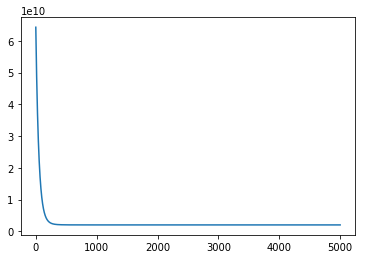

In [88]:
%matplotlib inline
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)

## Testez votre modèle

Que vaut une maison de 1650 pieds carrés et de 3 chambres à coucher? (Si la valeur est aberrante, vous avez peut-être oublié une étape...)

In [89]:
house = np.array([1, (1650-mean[1])/stdev[1], (3-mean[2])/stdev[2]])
price = predict(house, theta)
price

293081.4643382784